In [ ]:
import pandas as pd                                                                
import numpy as np                                              
import matplotlib.pyplot as plt                                                                       
import seaborn as sns                                                                     
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
Loan_data=pd.read_csv("train.csv")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
test_data=pd.read_csv("test.csv")

In [ ]:
Loan_data.shape

(614, 13)

In [ ]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


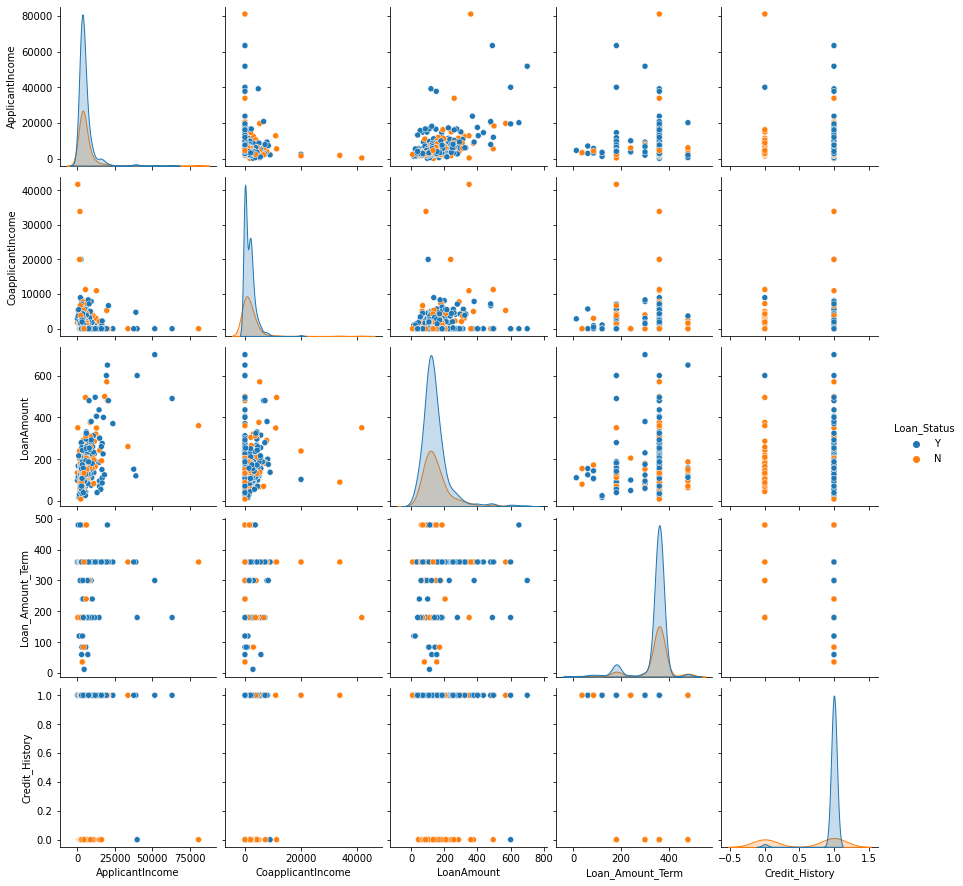

In [ ]:
sns.pairplot(Loan_data,hue='Loan_Status')

Exploratory Data Analysis

In [ ]:
Categorical_features=[feature for feature in Loan_data.columns if Loan_data[feature].dtypes == 'object']
Numerical_features=[feature for feature in Loan_data.columns if Loan_data[feature].dtypes != 'object']

In [ ]:
Continous_features=[]
Discrete_features=[]
for feature in Numerical_features:
    print(f'Number of unique values in column {feature} is {Loan_data[feature].nunique()}')
    if Loan_data[feature].nunique()>15:
        Continous_features.append(feature)
    else:
        Discrete_features.append(feature)

Number of unique values in column ApplicantIncome is 505
Number of unique values in column CoapplicantIncome is 287
Number of unique values in column LoanAmount is 203
Number of unique values in column Loan_Amount_Term is 10
Number of unique values in column Credit_History is 2


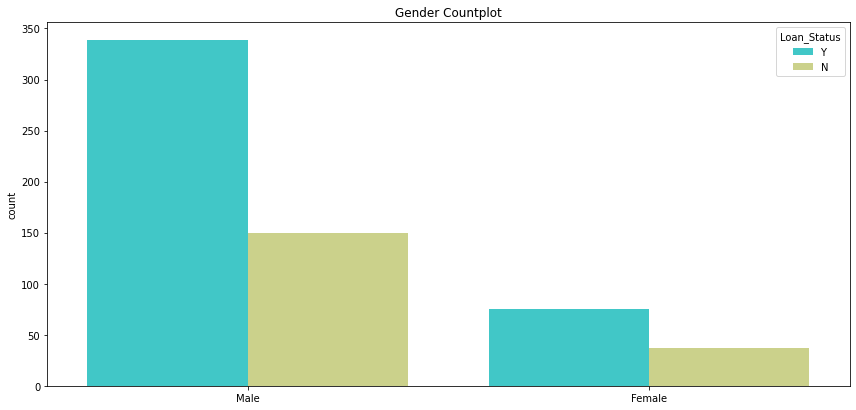

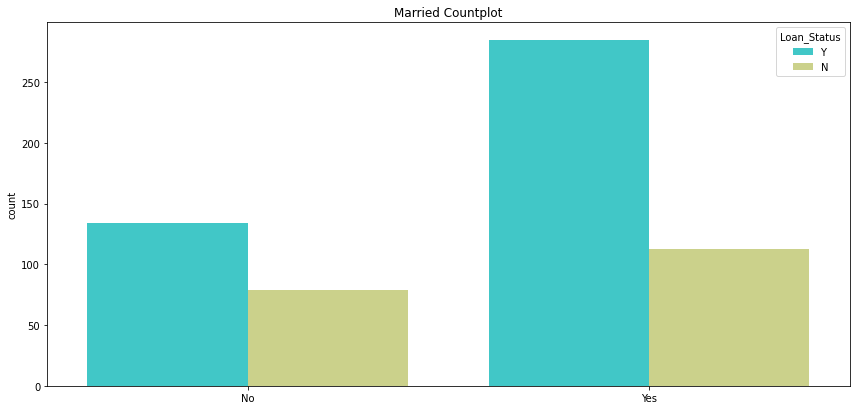

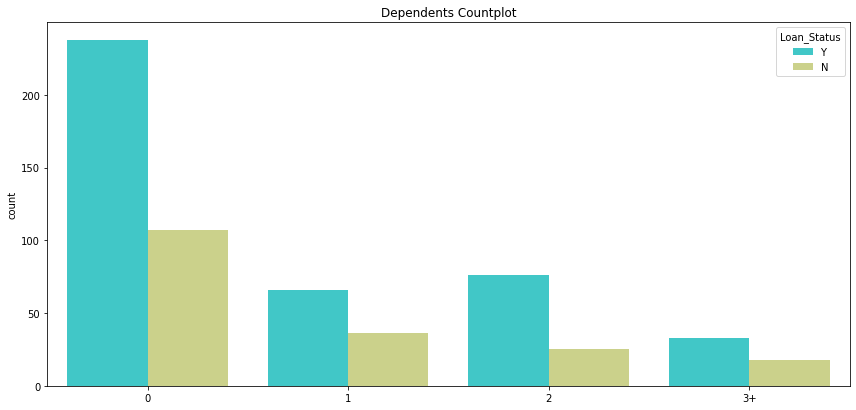

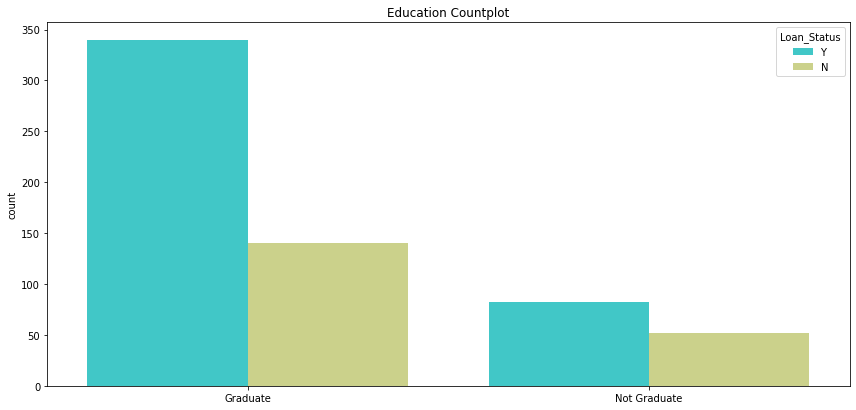

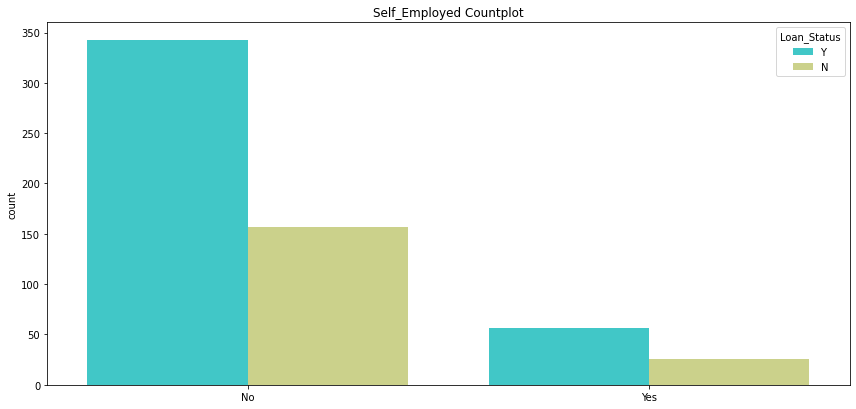

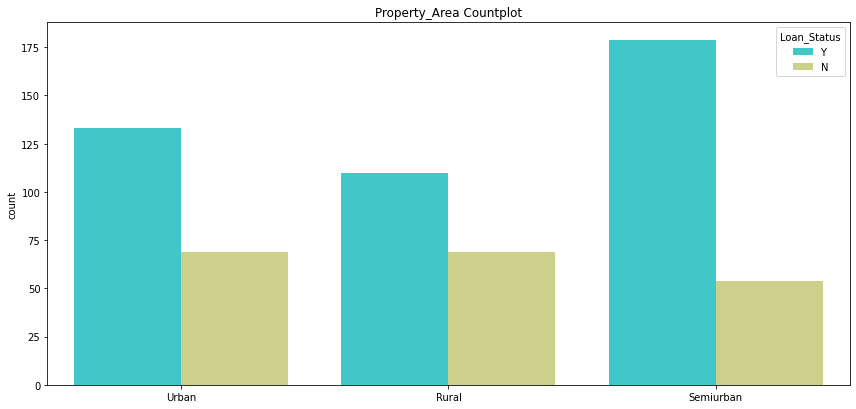

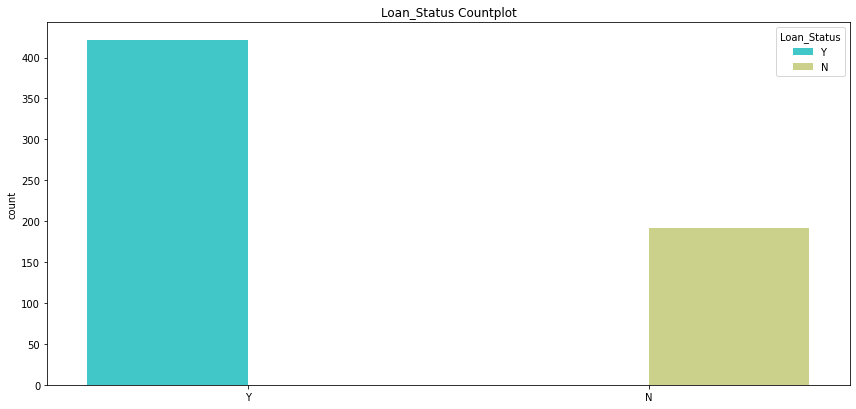

In [ ]:
for feature in Categorical_features[1:]:
    plt.figure(figsize=(12,6))
    sns.countplot(data=Loan_data,x=feature,palette="rainbow",hue='Loan_Status')
    plt.title(f"{feature} Countplot")
    plt.tight_layout()
    plt.xlabel("")
    plt.show()

 Null Values in Features

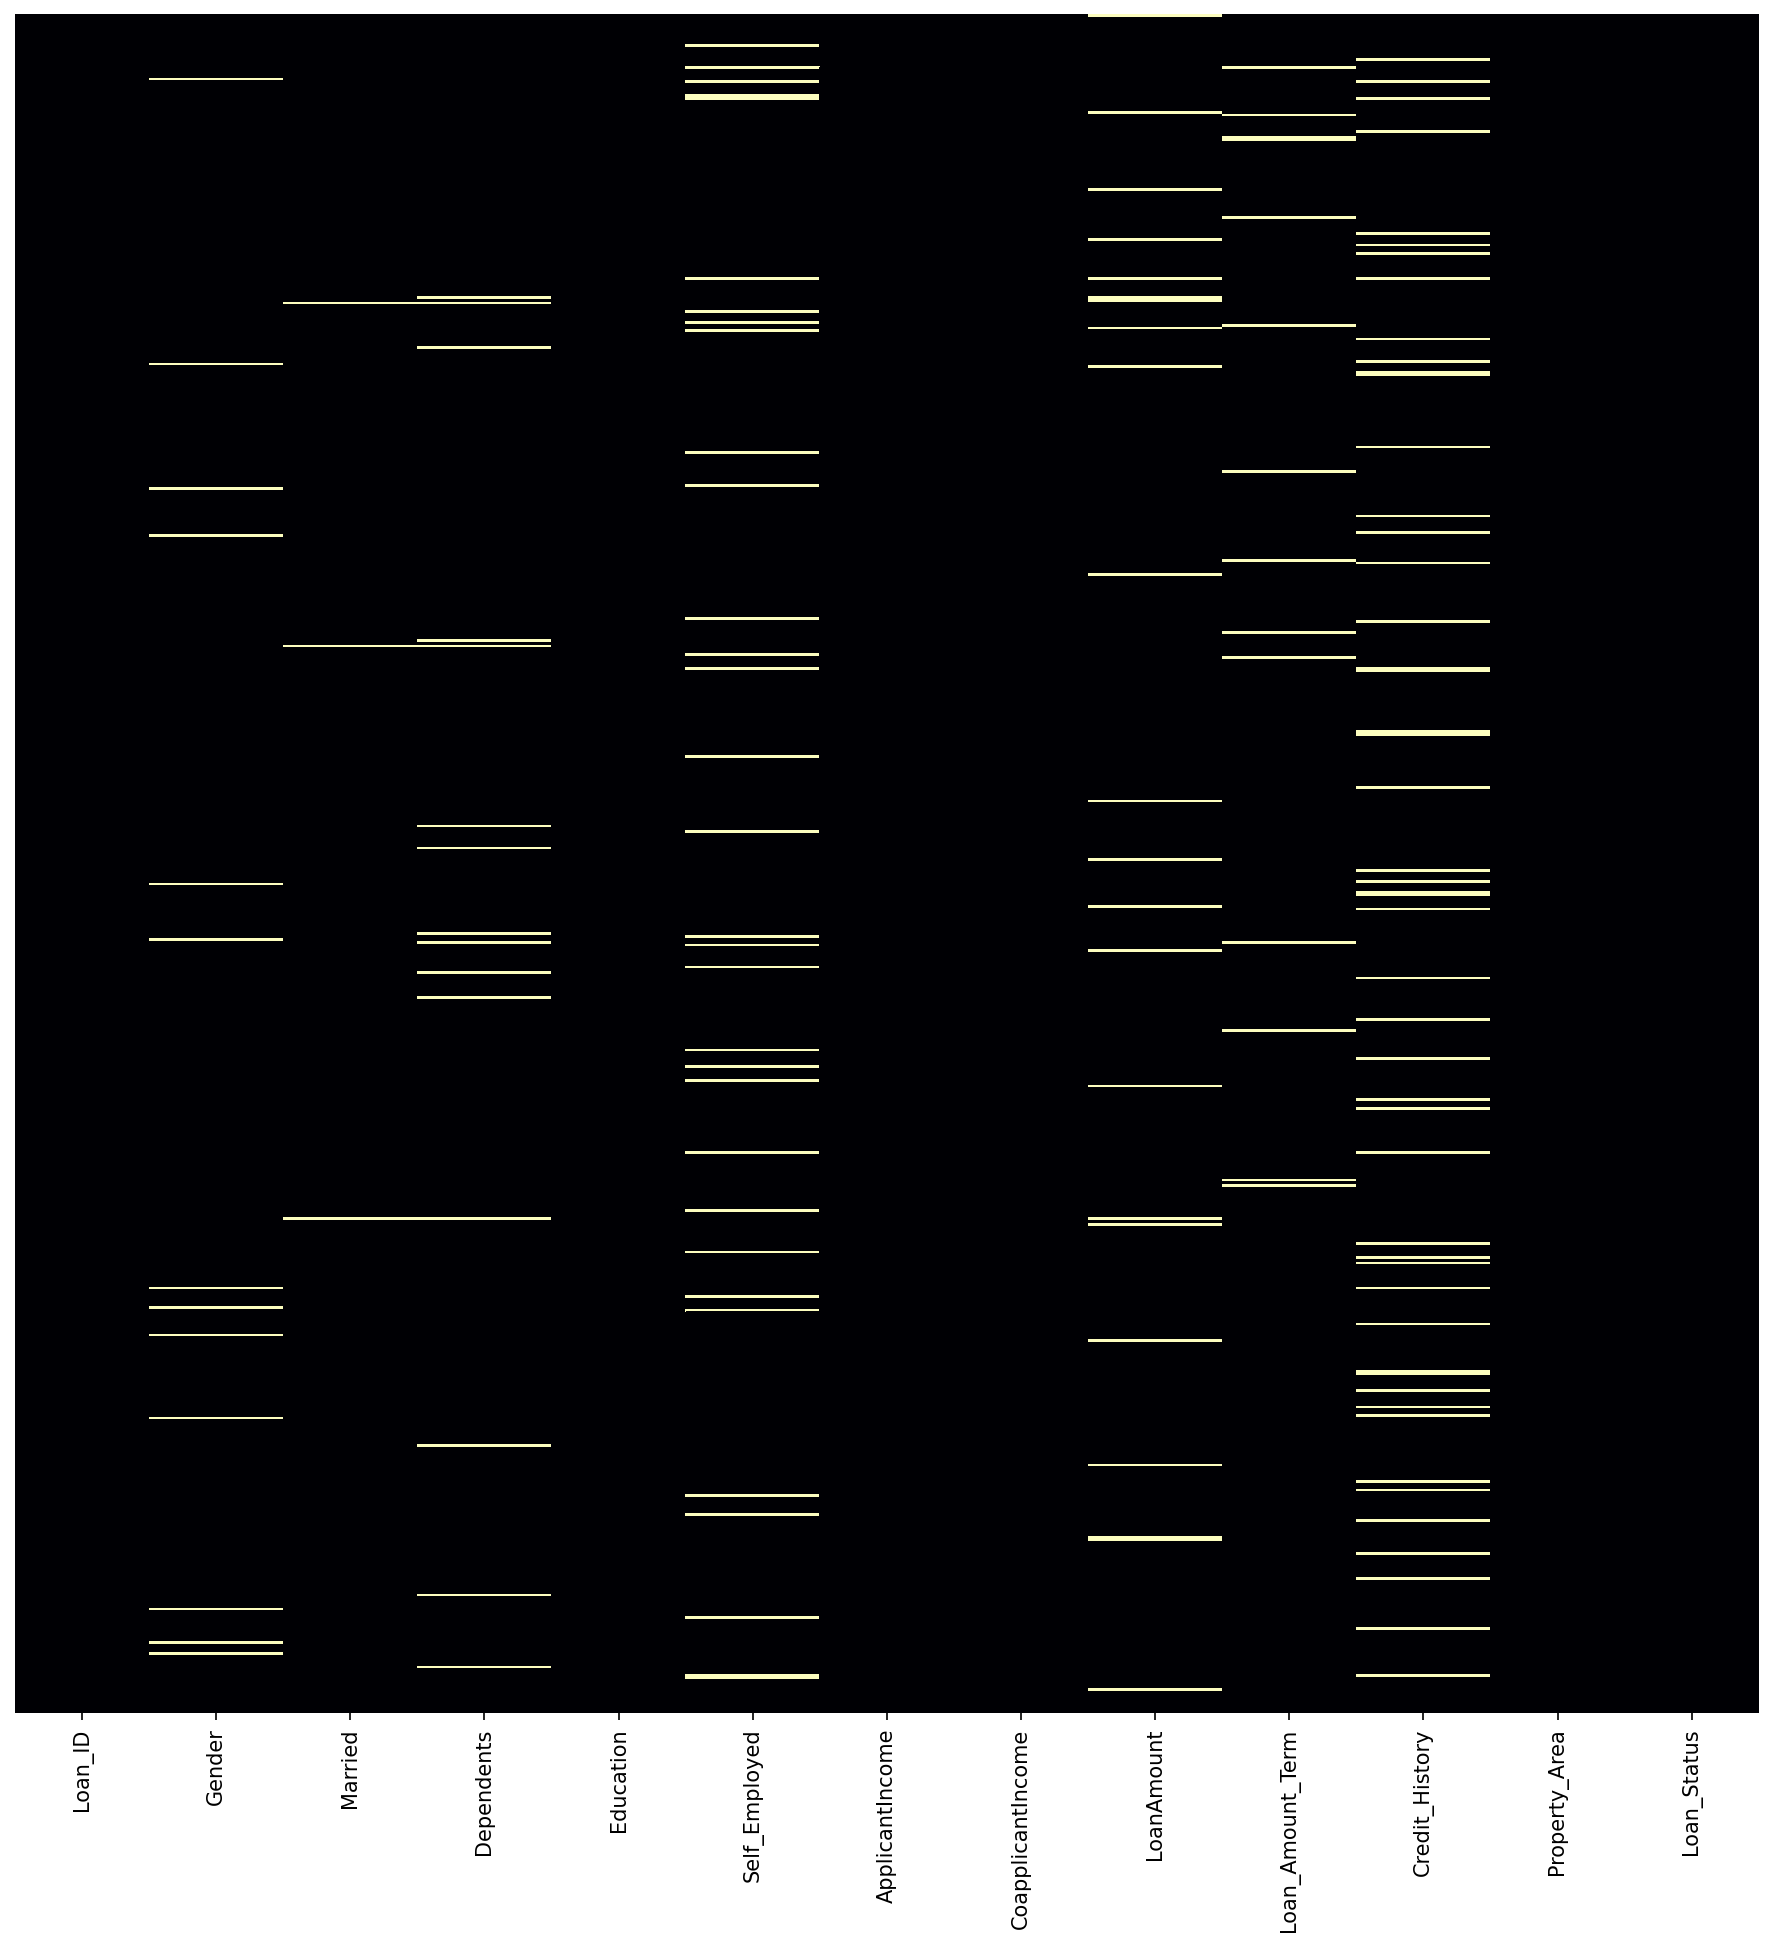

In [ ]:
plt.figure(figsize=(15,15),dpi=150)
sns.heatmap(Loan_data.isnull(),yticklabels=False,cbar=False,cmap='magma')


Using Mode to Fill Null Values 

In [ ]:
for feature in Categorical_features+Discrete_features:
    Loan_data[feature].fillna(Loan_data[feature].mode()[0],inplace=True)

Using Median to Fill Null Values

In [ ]:
for feature in Continous_features:
    Loan_data[feature].fillna(np.nanmedian(Loan_data[feature]),inplace=True)

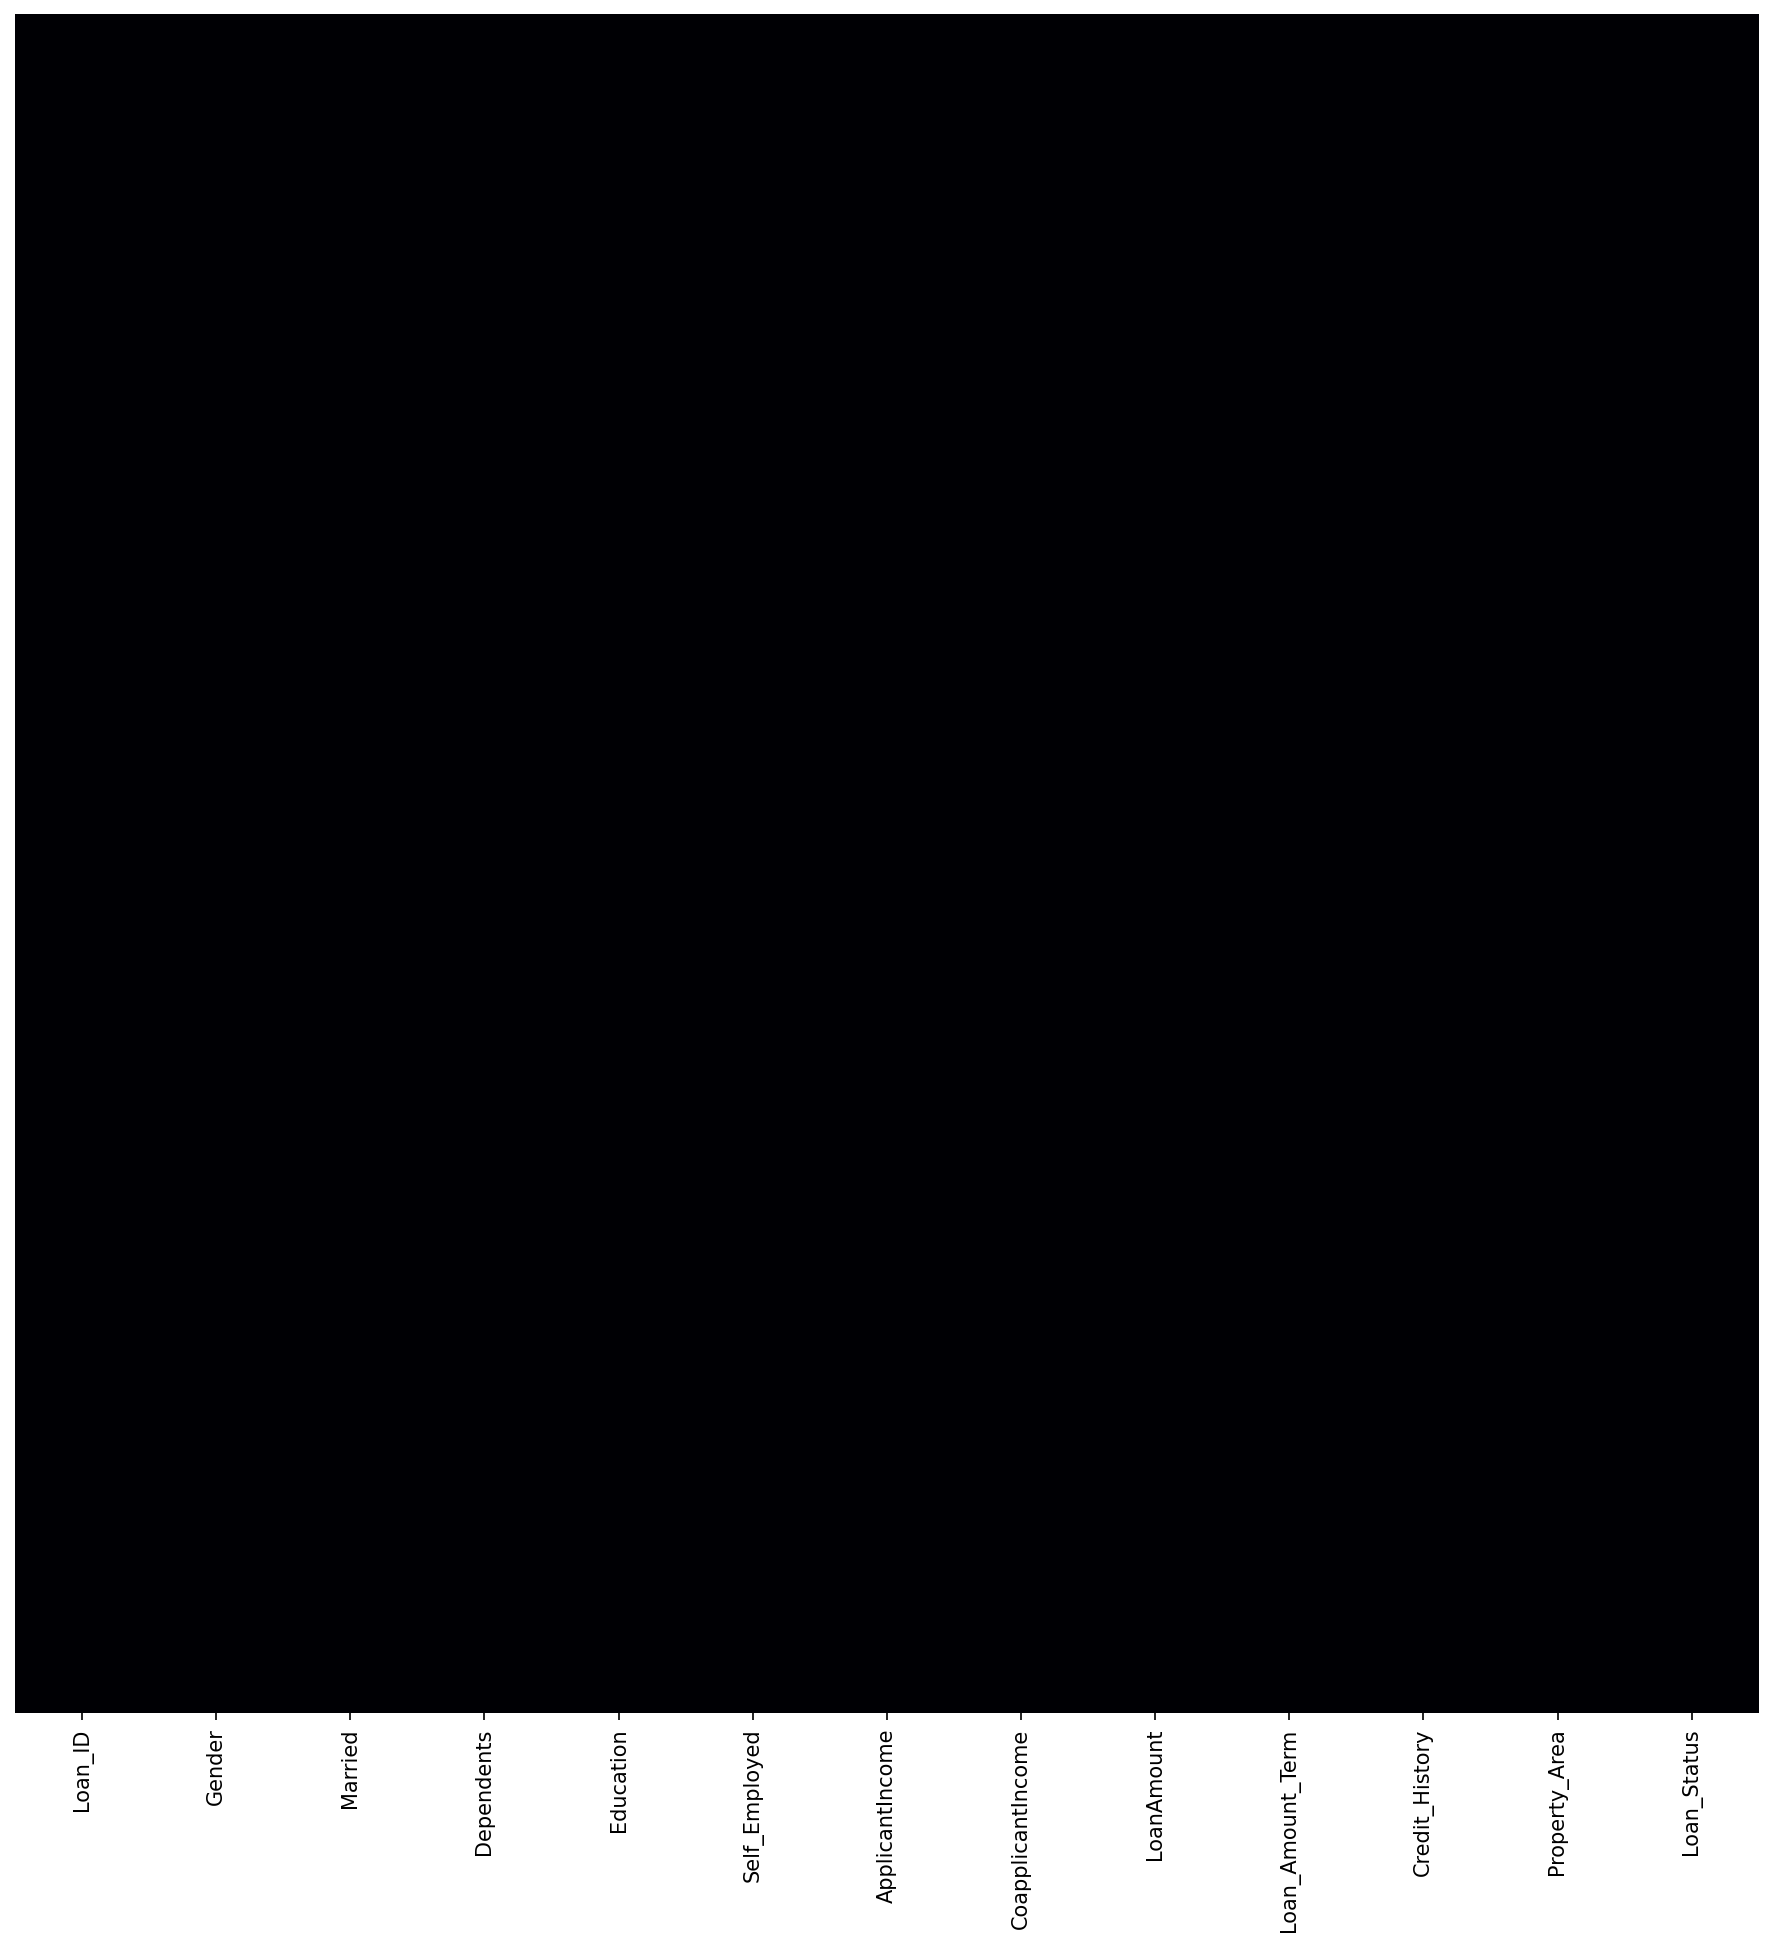

In [ ]:
plt.figure(figsize=(15,15),dpi=150)
sns.heatmap(Loan_data.isnull(),yticklabels=False,cbar=False,cmap='magma')

Correlation


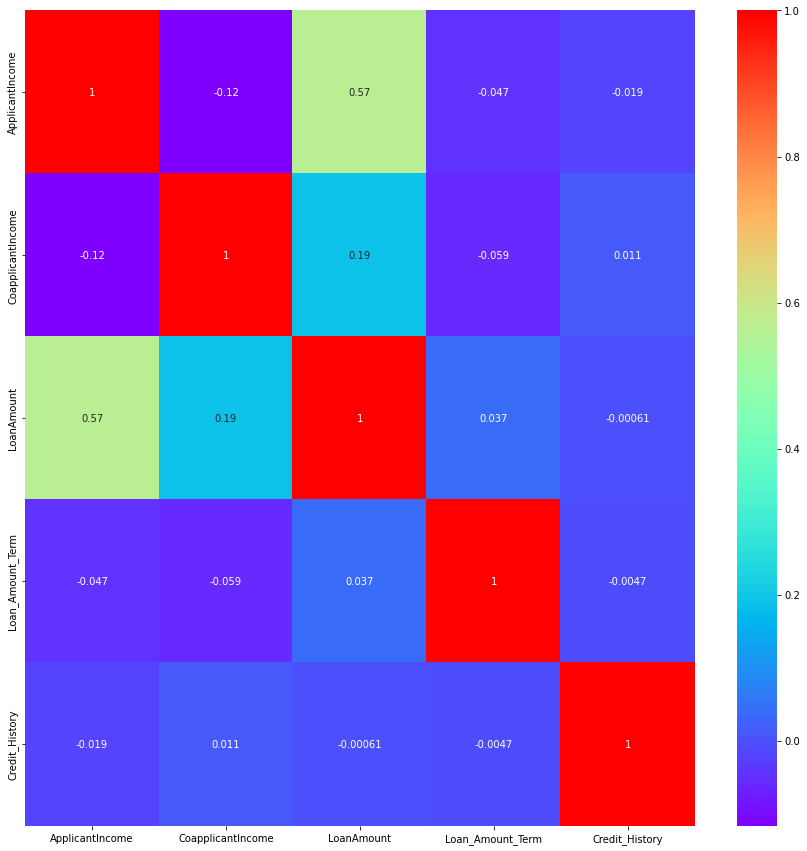

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(Loan_data.corr(),annot=True,cmap='rainbow')

In [ ]:
data=Loan_data.copy()
data["Total_Income"]=data["ApplicantIncome"]+data["CoapplicantIncome"]
data.drop(['Loan_ID','ApplicantIncome', 'CoapplicantIncome','Dependents'],inplace=True,axis=1)
Encoded_data=pd.DataFrame()

In [ ]:
for feature in data.columns:
    if(data[feature].nunique()>3):
        pass
    else:
        for i in range(data[feature].nunique()-1):
            Encoded_data[feature]=np.where(str(data[feature].unique()[i]) == data[feature],1,0)
Encoded_data["LoanAmount"]=data["LoanAmount"]
Encoded_data["Loan_Amount_Term"]=data["Loan_Amount_Term"]
Encoded_data["Total_Income"]=data["Total_Income"]
Encoded_data["Credit_History"]=data["Credit_History"]

Data Scaling


In [ ]:
Standard_data=Encoded_data.copy()
Standard_data['LoanAmount']=(Standard_data['LoanAmount']-Standard_data['LoanAmount'].min())/(Standard_data['LoanAmount'].max()-Standard_data['LoanAmount'].min())
Standard_data['Loan_Amount_Term']=(Standard_data['Loan_Amount_Term']-Standard_data['Loan_Amount_Term'].min())/(Standard_data['Loan_Amount_Term'].max()-Standard_data['Loan_Amount_Term'].min())
Standard_data['Total_Income']=(Standard_data['Total_Income']-Standard_data['Total_Income'].min())/(Standard_data['Total_Income'].max()-Standard_data['Total_Income'].min())
Standard_data

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount,Loan_Amount_Term,Total_Income
0,1,1,1,1,1.0,0,1,0.172214,0.743590,0.055394
1,1,0,1,1,1.0,1,0,0.172214,0.743590,0.058435
2,1,0,1,0,1.0,0,1,0.082489,0.743590,0.019583
3,1,0,0,1,1.0,0,1,0.160637,0.743590,0.043980
4,1,1,1,1,1.0,0,1,0.191027,0.743590,0.057292
...,...,...,...,...,...,...,...,...,...,...
609,0,1,1,1,1.0,1,1,0.089725,0.743590,0.018326
610,1,0,1,1,1.0,1,1,0.044863,0.358974,0.033485
611,1,0,1,1,1.0,0,1,0.353111,0.743590,0.086352
612,1,0,1,1,1.0,0,1,0.257598,0.743590,0.077189


In [ ]:
x = Standard_data.drop(columns="Loan_Status", axis=1)
y = Standard_data['Loan_Status']
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.2)

Logistic Regression Model

In [ ]:
loreg = LogisticRegression()

loreg.fit(x_train, y_train)
y_pred=loreg.predict(x_cv)

In [ ]:
print("Train Accuracy: ", loreg.score(x_cv, y_cv) * 100,' %')

Train Accuracy:  78.04878048780488  %


In [ ]:
print(classification_report(y_cv,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.38      0.54        42
           1       0.75      0.99      0.86        81

    accuracy                           0.78       123
   macro avg       0.85      0.68      0.70       123
weighted avg       0.82      0.78      0.75       123



In [ ]:
print(confusion_matrix(y_cv,y_pred))

[[16 26]
 [ 1 80]]


In [ ]:
score = cross_val_score(loreg, x, y, cv=5)
print("Cross validation is",np.mean(score)*100)

Cross validation is 80.9462881514061


SVM Classifier

In [ ]:
X=Standard_data[['Gender','Married','Education','Self_Employed','LoanAmount','Loan_Amount_Term',
             'Credit_History','Property_Area']]
Y=Standard_data['Loan_Status']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25)
# Using SVM first for predictions

from sklearn.svm import SVC

model=SVC()
model.fit(X,Y)

SVC()

In [ ]:
y_pred=model.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score

clf_accuracy=accuracy_score(y_pred,ytest)
print(clf_accuracy)

0.7987012987012987


In [ ]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.39      1.00      0.56        20
           1       1.00      0.77      0.87       134

    accuracy                           0.80       154
   macro avg       0.70      0.88      0.72       154
weighted avg       0.92      0.80      0.83       154



In [ ]:
print(confusion_matrix(y_pred,ytest))

[[ 20   0]
 [ 31 103]]


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(X,Y)
ypred=clf.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score

clf_accuracy=accuracy_score(ypred,ytest)
print(clf_accuracy)

0.987012987012987


In [ ]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.31      0.31      0.31        51
           1       0.66      0.66      0.66       103

    accuracy                           0.55       154
   macro avg       0.49      0.49      0.49       154
weighted avg       0.55      0.55      0.55       154



In [ ]:
print(confusion_matrix(ypred,ytest))


[[ 51   0]
 [  2 101]]


Decision Tree

In [ ]:
from sklearn import tree

model1=tree.DecisionTreeClassifier()
model1.fit(X,Y)
y_Pred=model1.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score

clf_accuracy=accuracy_score(y_pred,ytest)
print(clf_accuracy)

0.8506493506493507


In [ ]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.39      1.00      0.56        20
           1       1.00      0.77      0.87       134

    accuracy                           0.80       154
   macro avg       0.70      0.88      0.72       154
weighted avg       0.92      0.80      0.83       154



In [ ]:
print(confusion_matrix(y_pred,ytest))

[[ 31   1]
 [ 22 100]]
